In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop('id',axis=1,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
numcol = df.select_dtypes('float64').columns
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer(strategy='mean')
df[numcol]=num_imputer.fit_transform(df[numcol])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.drop(df.loc[df['gender'] == 'Other'].index, inplace=True)

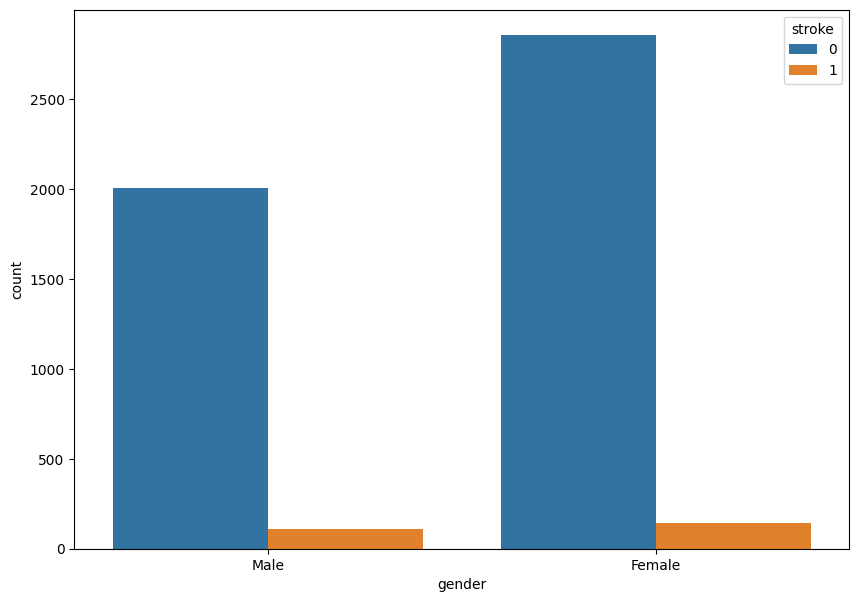

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['gender'],hue=df['stroke'])
plt.show()

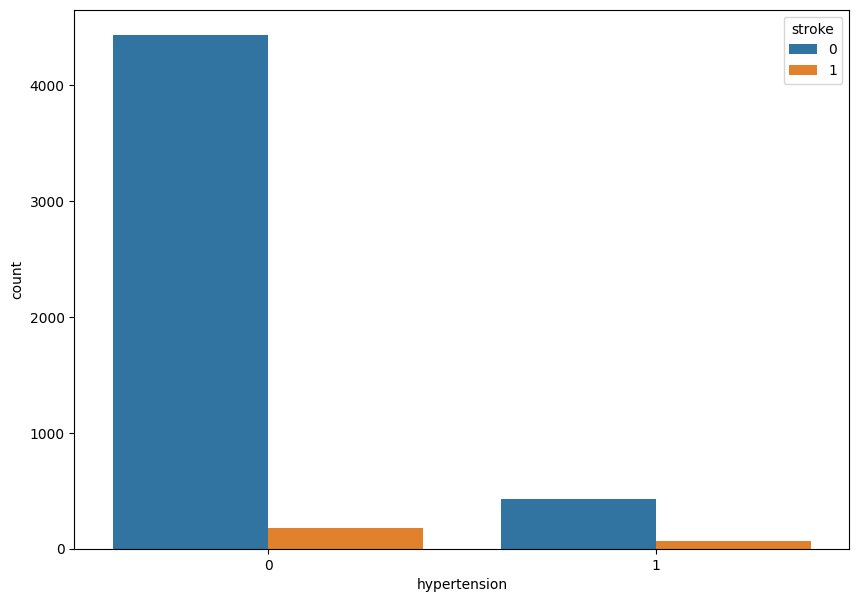

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['hypertension'],hue=df['stroke'])
plt.show()

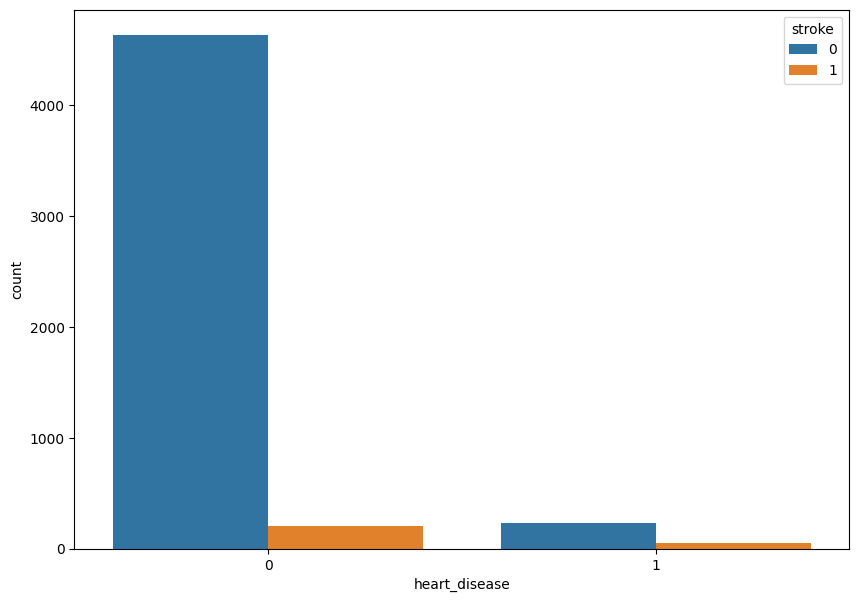

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['heart_disease'],hue=df['stroke'])
plt.show()

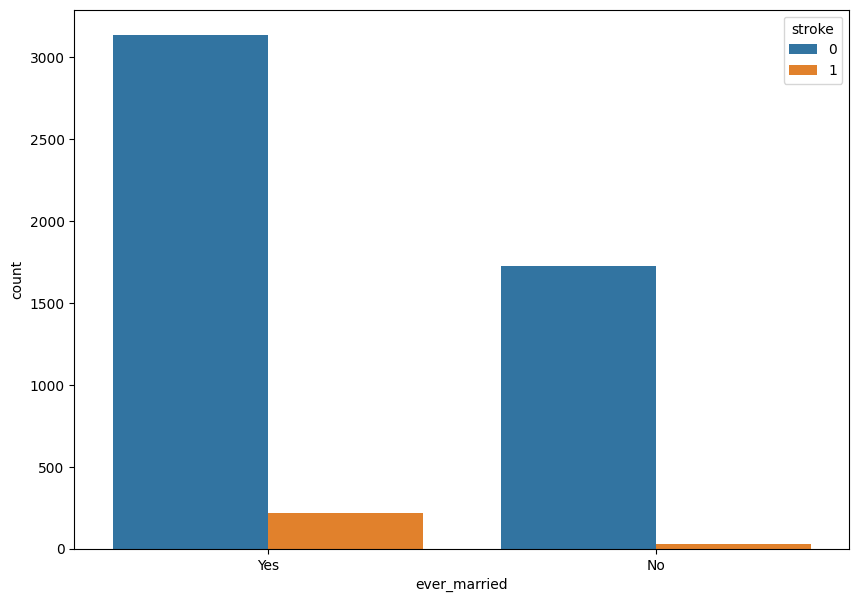

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['ever_married'],hue=df['stroke'])
plt.show()

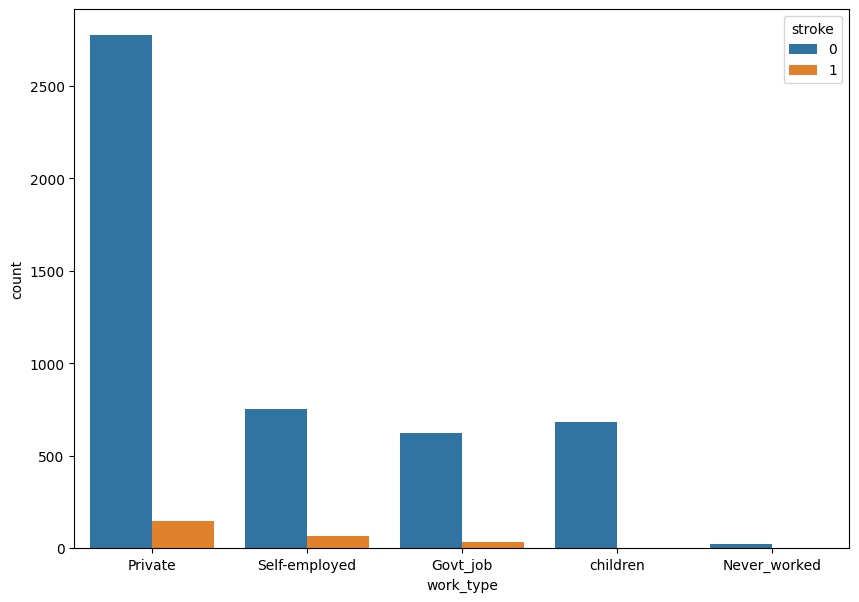

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['work_type'],hue=df['stroke'])
plt.show()

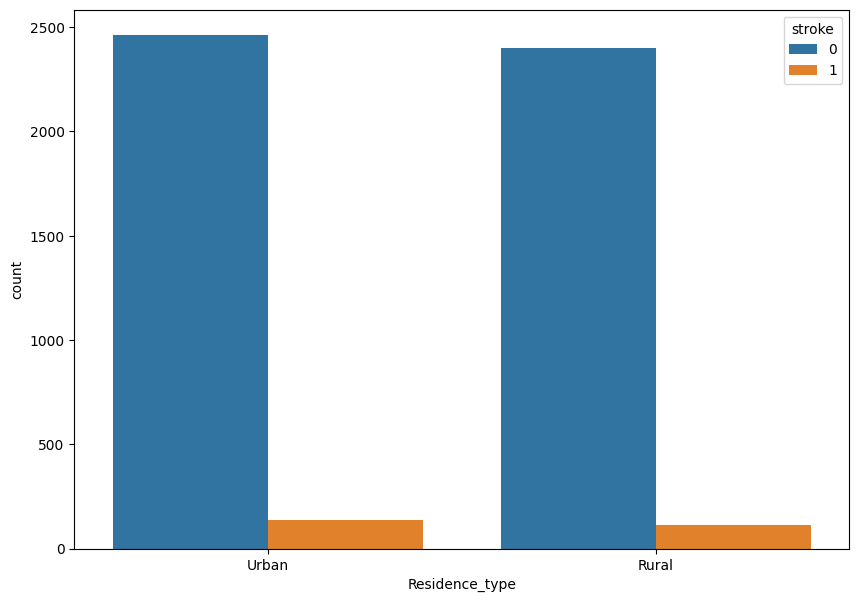

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['Residence_type'],hue=df['stroke'])
plt.show()

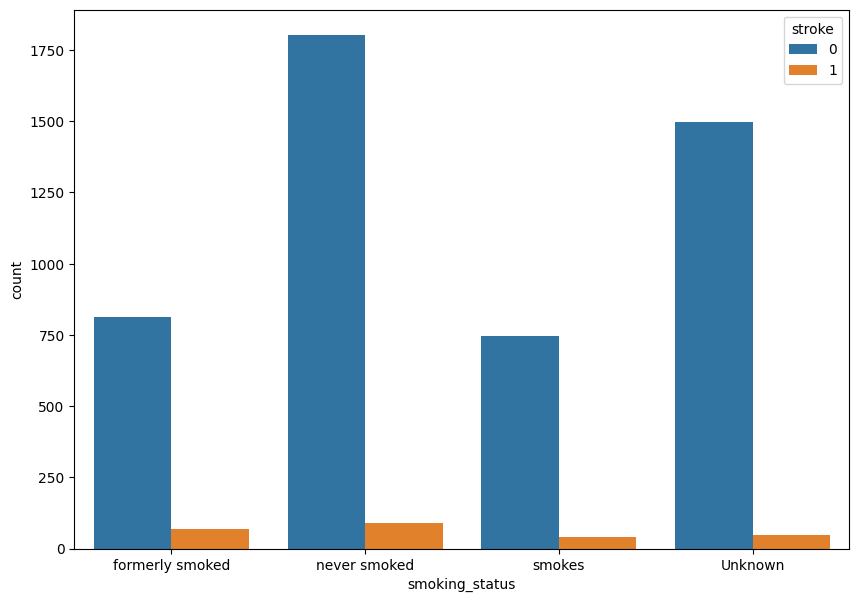

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['smoking_status'],hue=df['stroke'])
plt.show()

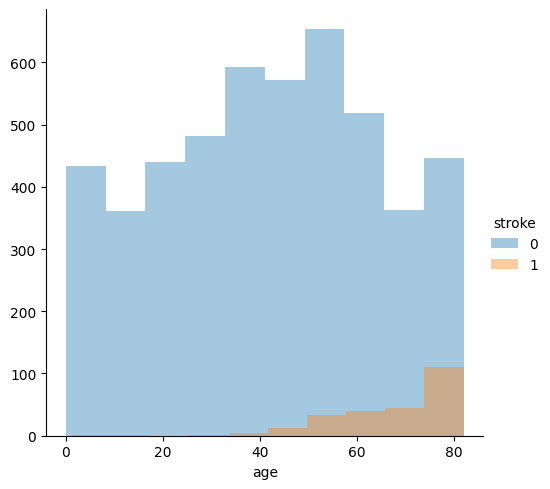

In [ ]:
g = sns.FacetGrid(df, hue='stroke', height=5)
g.map(sns.distplot, 'age', kde=False, bins=10, hist=True)
g.add_legend()
plt.show()

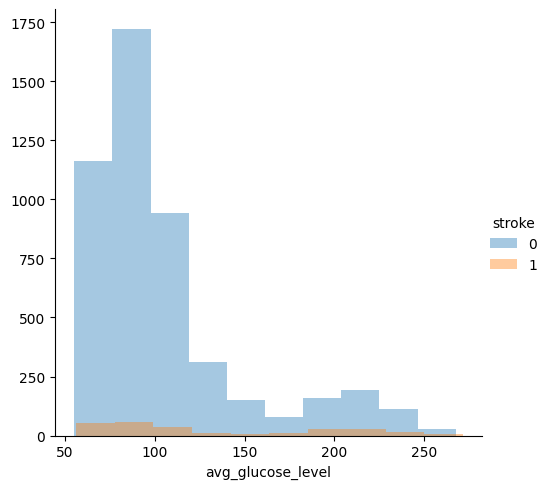

In [ ]:
g = sns.FacetGrid(df, hue='stroke', height=5)
g.map(sns.distplot, 'avg_glucose_level', kde=False, bins=10, hist=True)
g.add_legend()
plt.show()

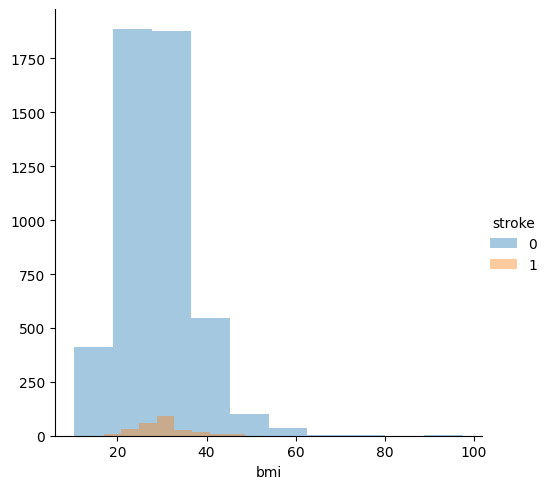

In [ ]:
g = sns.FacetGrid(df, hue='stroke', height=5)
g.map(sns.distplot, 'bmi', kde=False, bins=10, hist=True)
g.add_legend()
plt.show()

In [ ]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import klib

<Axes: xlabel='bmi', ylabel='Density'>

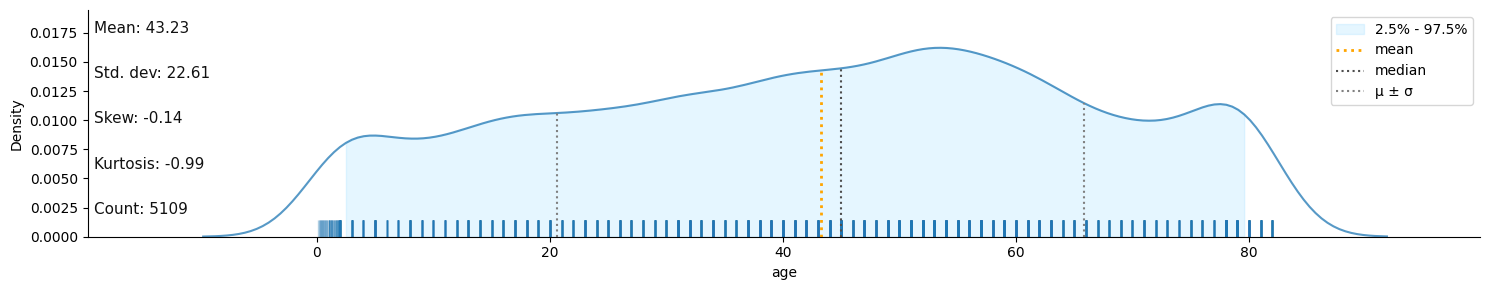

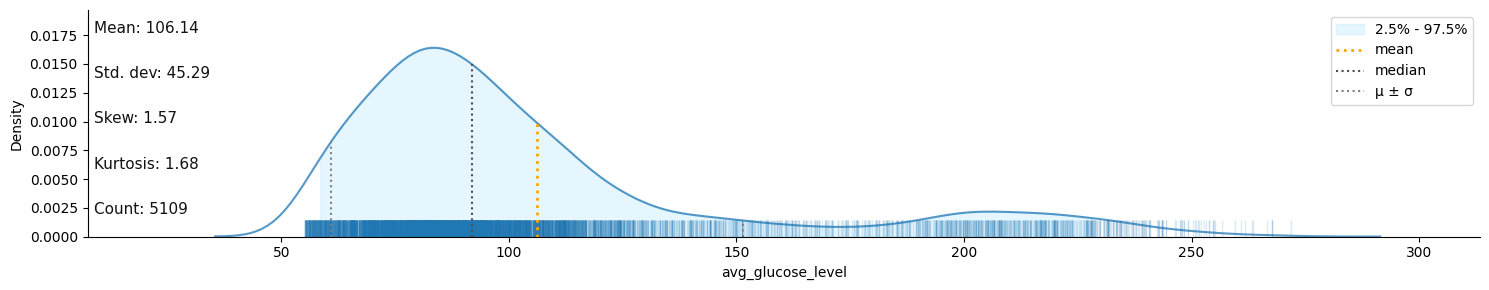

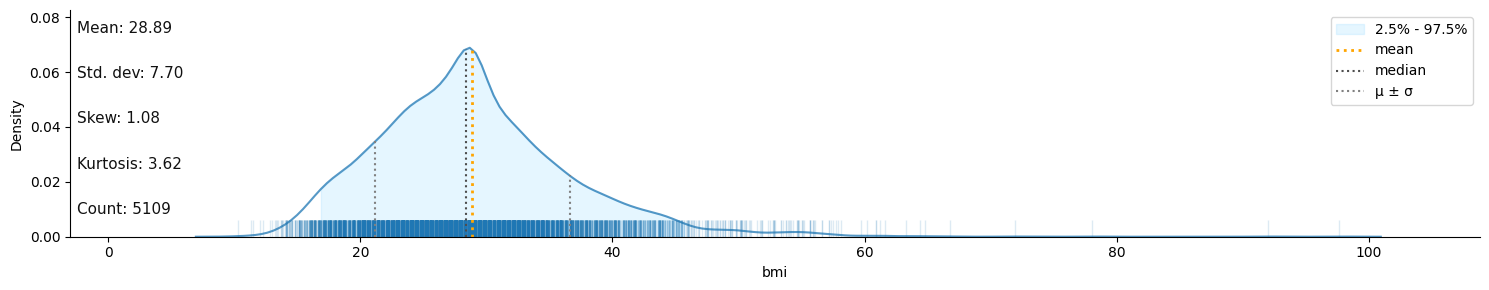

In [ ]:
klib.dist_plot(df)

In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109,5109.000000,5109.000000,5109.000000,5109,5109,5109,5109.000000,5109.000000,5109,5109.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2924,2596,NaN,NaN,1892,NaN
mean,NaN,43.229986,0.097475,0.054022,NaN,NaN,NaN,106.140399,28.894508,NaN,0.048738
std,NaN,22.613575,0.296633,0.226084,NaN,NaN,NaN,45.285004,7.698235,NaN,0.215340
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.240000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.880000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
catcol=df.select_dtypes('object').columns
df[catcol]=oe.fit_transform(df[catcol])

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054722,-0.025606,-0.062423,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.238323,0.325858,0.265165,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.174540,0.160147,0.111018,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.161907,0.038862,0.048445,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.155329,0.335563,0.259604,0.108299
work_type,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.050492,-0.299495,-0.305942,-0.032323
Residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.004783,-0.000288,0.008168,0.015415
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,-0.050492,-0.004783,1.000000,0.168910,0.063498,0.131991
bmi,-0.025606,0.325858,0.160147,0.038862,0.335563,-0.299495,-0.000288,0.168910,1.000000,0.219108,0.038912
smoking_status,-0.062423,0.265165,0.111018,0.048445,0.259604,-0.305942,0.008168,0.063498,0.219108,1.000000,0.028108


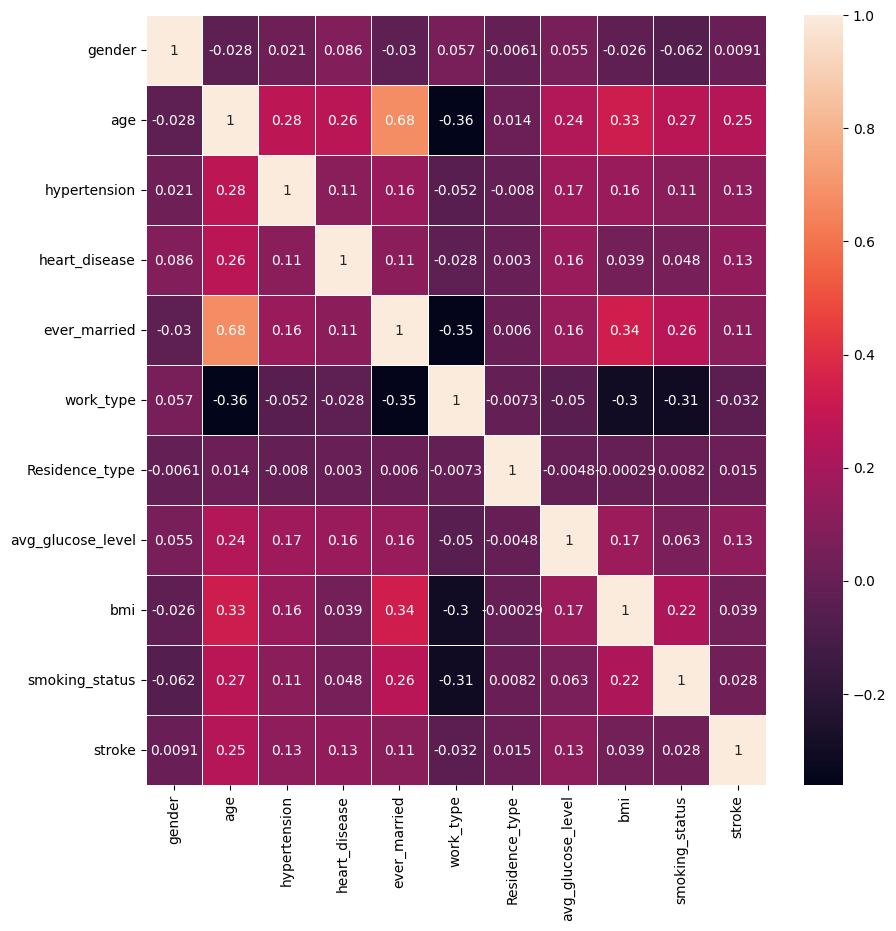

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, linewidth=0.5)
plt.show()

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
x

array([[  1.        ,  67.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,  61.        ,   0.        , ..., 202.21      ,
         28.89323691,   2.        ],
       [  1.        ,  80.        ,   0.        , ..., 105.92      ,
         32.5       ,   2.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.18807255e+00,  1.05143428e+00, -3.28601864e-01, ...,
         2.70637544e+00,  1.00123401e+00, -3.51780710e-01],
       [-8.40343999e-01,  7.86070073e-01, -3.28601864e-01, ...,
         2.12155854e+00,  4.61555355e-16,  5.81552327e-01],
       [ 1.18807255e+00,  1.62639008e+00, -3.28601864e-01, ...,
        -5.02830130e-03,  4.68577254e-01,  5.81552327e-01],
       ...,
       [-8.40343999e-01, -3.63841511e-01, -3.28601864e-01, ...,
        -5.11442636e-01,  2.21736316e-01,  5.81552327e-01],
       [ 1.18807255e+00,  3.43796387e-01, -3.28601864e-01, ...,
         1.32825706e+00, -4.27845098e-01, -3.51780710e-01],
       [-8.40343999e-01,  3.42048064e-02, -3.28601864e-01, ...,
        -4.60867458e-01, -3.49895329e-01, -1.28511375e+00]])

**Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
ann=Sequential()
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=ann.fit(xtrain,ytrain,epochs=500,validation_data=(xtest,ytest),verbose=1,batch_size=128,callbacks=[early_stop])

Epoch 1/500
28/28 [==============================] - 1s 8ms/step - loss: 0.5796 - accuracy: 0.7154 - val_loss: 0.4512 - val_accuracy: 0.9159
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.9452 - val_loss: 0.3138 - val_accuracy: 0.9504
Epoch 3/500
28/28 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.9514 - val_loss: 0.2452 - val_accuracy: 0.9511
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.9514 - val_loss: 0.2138 - val_accuracy: 0.9511
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9514 - val_loss: 0.1977 - val_accuracy: 0.9511
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.9514 - val_loss: 0.1888 - val_accuracy: 0.9511
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9514 - val_loss: 0.1833 - val_accuracy: 0.9511
Epoch 8/500
2

In [ ]:
ypred=ann.predict(xtest)

48/48 [==============================] - 0s 832us/step


In [ ]:
ypred

array([[7.3678650e-02],
       [6.3807331e-02],
       [5.6290057e-02],
       ...,
       [4.9680745e-04],
       [4.8091778e-04],
       [3.8605176e-05]], dtype=float32)

In [ ]:
ypred=np.where(ypred<0.5,0,1)
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



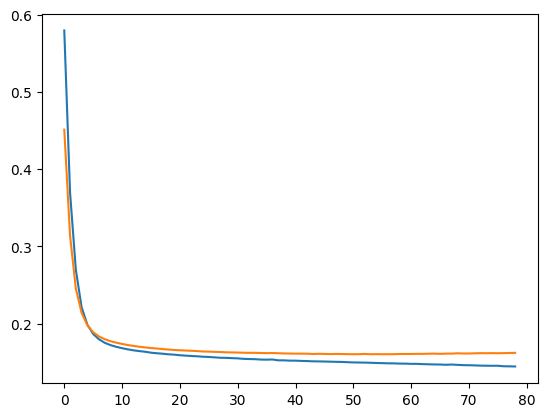

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()